### Authored by : Sagar Rawale(Aspiring Data Scientist)

# Problem Statement 

<strong>Build a model to predict whether the customer will accept Card Offer or not.</strong>

### Business Goal:
<hr/><span style="color:black; font-family: 'calibri'; font-size: 1.2em;">
We need to build a model which will <strong>help management of the company to minimize their allocation of resources/people and put them towards more targeted customers</strong> who will be most likely to subscribe for an card offer predicted by the model.  

Our goal is to
<ul>
<li>predict whether the customer will take the Card Offer or not based on his/her financial details and demographical information (as given in the Dataset).</li>
<li>analyze which information helps the most in such decision making and in future build some policies around it.</li>
</ul>

### Approach
<hr/><span style="color:black; font-family: 'calibri'; font-size: 1.2em;">By using standard approach / steps for any Machine Learning lifecycle project or some of the steps mentioned in  <a href="https://en.wikipedia.org/wiki/Cross-industry_standard_process_for_data_mining">CRISP-DM (Cross Industry Standard Process Data Mining)</a> model. 
<ol>
<li>Data understanding</li>
<li>Analyze the dataset and transform it using
<ul>
<li>Exploratory Data Analysis</li>
<li>Feature Engineering</li>
</ul>
<li>Model Building</li>
<ul>
<li>Logistic Regression (LR)</li>
<li>Decision Tree (DT)</li>
<li>Random Forest (Boostrap Ensemble of DT)</li>
</ul>
<li>Performance Evaluation at each step of Model Building</li>
<li>Model Selection</li>
</ol></span>

### Considerations for Model Selection
<hr/>
<span style="color:black; font-family: 'calibri'; font-size: 1.2em;">Based on the problem statement and goal to be achieved, we need to predict the customer will take card offer or not.


This indicates that this is <strong>a classification problem</strong>. 

We will be evaluating performance of a model based on following error metrics: 
<ol>
<li>Accuracy: Accuracy Score</li>
<li>AUROC Score of the model.</li>
<li>F1 Score.</li>
<li>Precision/Recall Score</li>
<li>Top feature importances predicted by each model</li>
</ol>

while doing so I will explore several models and try to evaluate the performance of each model using these metrics.

Following steps to be followed for appropriate model selection
- Train data on basic model
- Evaluate performance metric
- Perform Hyperparameter Tuning on model
- Evaluate performance metric


[Repeat above steps for each model]

NOTE : The selection of threshold value for decision boundary is based on our intuition/Assumptions. 

</span>

# Preliminaries

In [708]:
# numpy and pandas imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ML Libraries for scikit
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree 
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn import tree
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,\
                            precision_recall_curve,precision_score,recall_score,roc_auc_score,\
                             f1_score
from scipy.stats import skew

#  Recursive Feature Elimination
#from sklearn.feature_selection import RFE
        
# Python imports
from math import log, sqrt
import re
import collections
import warnings



# Loading Data set

In [709]:
path = 'Desktop/tresvista/test1.csv'
path1 = 'Desktop/tresvista/test2.csv'
df_orignal = pd.read_csv(path)
df_test1 = pd.read_csv(path1)
df_orignal.head()

,customer_id,demographic_slice,country_reg,ad_exp,est_income,hold_bal,pref_cust_prob,imp_cscore,RiskScore,imp_crediteval,axio_score,card_offer
0,713782,AX03efs,W,N,33407.901749,3.000000,0.531112,619,503.249027,23.977827,0.137289,False
1,515901,AX03efs,E,N,19927.533533,20.257927,0.297439,527,820.108146,22.986398,0.052264,False
2,95166,AX03efs,W,Y,51222.470997,4.000000,0.018463,606,586.605795,24.939219,0.452035,False
3,425557,AX03efs,E,Y,67211.587467,18.653631,0.089344,585,634.701982,24.841147,0.564619,False
4,624581,AX03efs,W,N,20093.342158,4.000000,0.094948,567,631.949979,24.679363,0.917304,False


## Data Understanding
<span style="color:black; font-family: 'calibri'; font-size: 1.2em;">Dataset contains total <strong>12 columns.</strong></b>
Out of which <strong>8 are numeric</strong>, <strong>3 are categorical</strong> and <strong>1 is boolean</strong>.

<strong>card_offer</strong> is the column we have to predict for unseen data.

Lets see our features in dataset
<ol>
<li>customer_id : Unique ID for each Customer [Numeric]</li>
<li>demographic_slice : segmentation of customer details [Categorical]</li>
<li>country_reg : Country Region(W/E) [Categorical]</li>
<li>ad_exp : Have Experience or not [Categorical]</li>
<li>est_income : Income of the customer [Numeric]</li>
<li>hold_bal : Remaining Balance of the customer [Numeric]</li>
<li>pref_cust_prob : Probablity of customer preference [Numeric]</li>
<li>imp_cscore : Credit score of the customer [Numeric]</li>
<li>RiskScore : Risk score of the customer [Numeric]</li>
<li>imp_crediteval : Credit value of the customer [Numeric]</li>
<li>axio_score : Score of the customer [Numeric]</li>
<li>card_offer : Whether card offer accepted by customer or not[Boolean]</li>
</ol>


In [710]:
df = df_orignal.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
customer_id          10000 non-null int64
demographic_slice    10000 non-null object
country_reg          10000 non-null object
ad_exp               10000 non-null object
est_income           10000 non-null float64
hold_bal             10000 non-null float64
pref_cust_prob       10000 non-null float64
imp_cscore           10000 non-null int64
RiskScore            10000 non-null float64
imp_crediteval       10000 non-null float64
axio_score           10000 non-null float64
card_offer           10000 non-null bool
dtypes: bool(1), float64(6), int64(2), object(3)
memory usage: 752.0+ KB


<span style="color:black; font-family: 'calibri'; font-size: 1.2em;">As you can see from the above information, the dataset does not look to have missing values.</b>

In [90]:
print("Explanatory variables:  {}".format(len(df.columns)-1))
print("Number of Observations: {}".format(df.shape[0]))
print("Target variable:       '{}'".format('card_offer'))

Explanatory variables:  11
Number of Observations: 10000
Target variable:       'card_offer'


## Exploratory Data Analysis

Replace boolean values in target feature with binary '0' and '1'
- 0 for False [card offer rejected]
- 1 for True [card offer accepted]

In [711]:
df['card_offer'].replace([False, True], [0, 1], inplace=True)
df.head()

,customer_id,demographic_slice,country_reg,ad_exp,est_income,hold_bal,pref_cust_prob,imp_cscore,RiskScore,imp_crediteval,axio_score,card_offer
0,713782,AX03efs,W,N,33407.901749,3.000000,0.531112,619,503.249027,23.977827,0.137289,0
1,515901,AX03efs,E,N,19927.533533,20.257927,0.297439,527,820.108146,22.986398,0.052264,0
2,95166,AX03efs,W,Y,51222.470997,4.000000,0.018463,606,586.605795,24.939219,0.452035,0
3,425557,AX03efs,E,Y,67211.587467,18.653631,0.089344,585,634.701982,24.841147,0.564619,0
4,624581,AX03efs,W,N,20093.342158,4.000000,0.094948,567,631.949979,24.679363,0.917304,0


<strong>What percentage of people accepted the card offer according to the dataset?</strong>


Lets find out,

Class Statistics on entire data 10000:


,Count,Percent Split
False,8469,84.69
True,1531,15.31


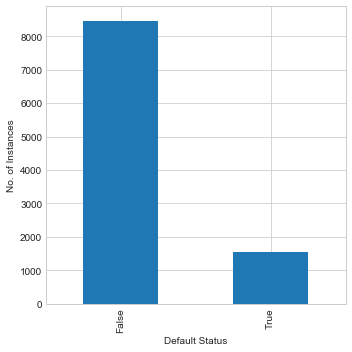

In [712]:
total_cnt = df.shape[0]
print 'Class Statistics on entire data {}:'.format(total_cnt)
cls_cnt = df['card_offer'].value_counts()
cls_stats = pd.DataFrame ({"Count": [cls_cnt[0], cls_cnt[1]],\
                        "Percent Split" : [((cls_cnt[0] * 100.0) /total_cnt), ((cls_cnt[1] * 100.0) /total_cnt)]},
                         index=["False", "True"])
display(cls_stats)
plt.figure(figsize=(5,5))
ax = cls_cnt.plot(kind='bar')
ax.set_xlabel("Default Status")
ax.set_ylabel("No. of Instances")
ax.set_xticklabels(['False', 'True'])
plt.tight_layout()
plt.show()

<strong>Thus 15.31% instances accepted card offers among all.</strong>

Assuming these problem is not imbalance problem in dataset for now lets go ahead for further analysis of data.

### Exploring Categorical Variables

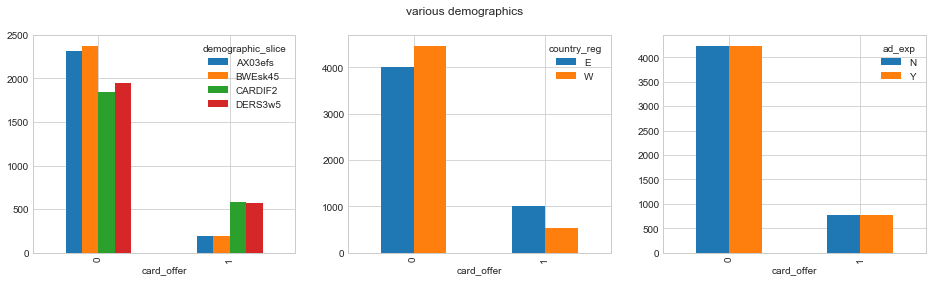

In [609]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(16,4)
fig.suptitle('various demographics')

d = df.groupby(['card_offer', 'demographic_slice']).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[0])

d = df.groupby(['card_offer', 'country_reg']).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[1])

d = df.groupby(['card_offer', 'ad_exp']).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[2])



No explicit conclusion can be drawn from above count plots. 

Lets see correlation of our independant features with each other.

In [8]:
#sns.pairplot(df)

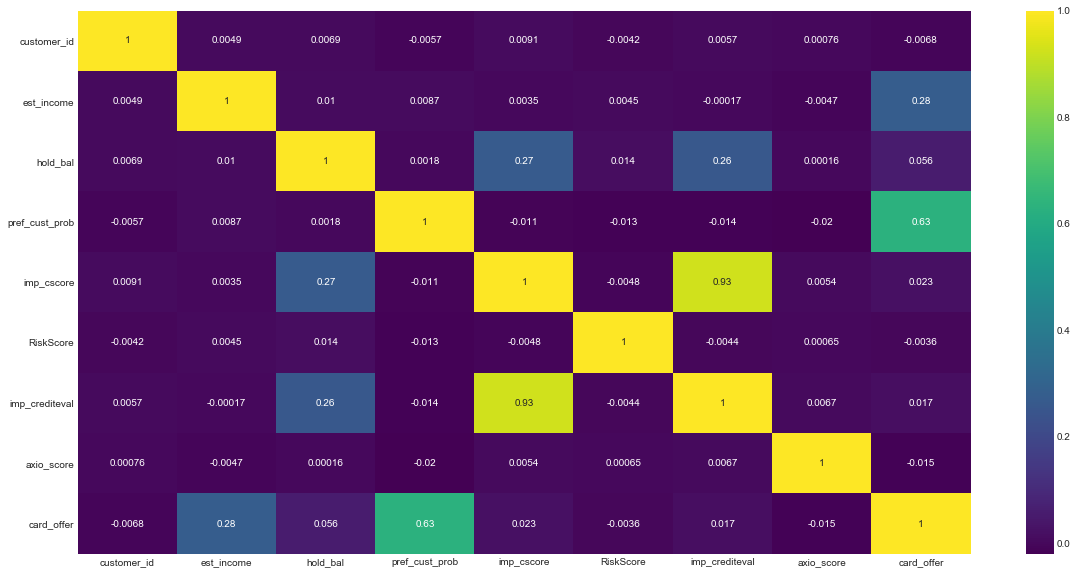

In [610]:
df_corr = df.copy()
cm = df_corr.corr()
plt.figure(figsize=(20,10))
sns.heatmap(cm, annot=True, cmap = 'viridis')

It is observed from heatmap that

- __imp_crediteval__ is highly correlated with variable __imp_csore__. Thus we can remove any one of them from dataset.


### Feature Engineering

In [713]:
#train data set
dummies_df = pd.get_dummies(df[["demographic_slice","country_reg" , "ad_exp"]])
print dummies_df.shape
df1 = df.copy()
df1.drop(["demographic_slice","country_reg" , "ad_exp", "imp_cscore"], axis=1 ,inplace=True)
df1.head()

(10000, 8)


,customer_id,est_income,hold_bal,pref_cust_prob,RiskScore,imp_crediteval,axio_score,card_offer
0,713782,33407.901749,3.000000,0.531112,503.249027,23.977827,0.137289,0
1,515901,19927.533533,20.257927,0.297439,820.108146,22.986398,0.052264,0
2,95166,51222.470997,4.000000,0.018463,586.605795,24.939219,0.452035,0
3,425557,67211.587467,18.653631,0.089344,634.701982,24.841147,0.564619,0
4,624581,20093.342158,4.000000,0.094948,631.949979,24.679363,0.917304,0


As you can see from the above information, the dataset has 3 categorial values, so we perform __One Hot Encoding__ to convert into numerial values.

In [714]:
df1.drop(['customer_id'],inplace=True, axis=1)
df1.shape

(10000, 7)

##### Remove redundant features
There are many unique customer ids in dataset.

Thus there are chances of our model biasing towards the data which contains customer id of a customer who had previously accpeted card offer from the company. Hence removing it will help model to focus on other important features.

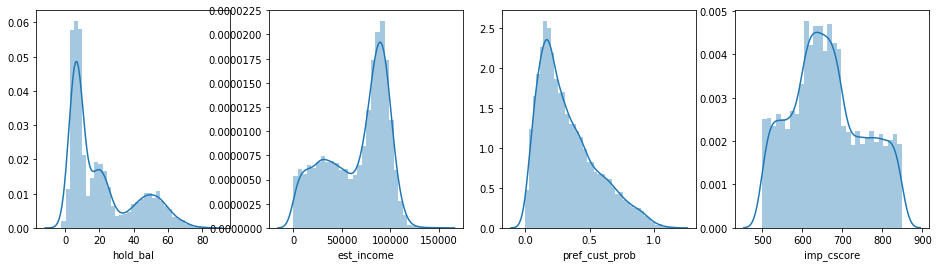

In [10]:
fig, ax = plt.subplots(1,4)
fig.set_size_inches(16,4)
sns.distplot(df['hold_bal'],kde=True ,ax=ax[0])
sns.distplot(df['est_income'],kde=True , ax=ax[1])
sns.distplot(df['pref_cust_prob'],kde=True , ax=ax[2])
sns.distplot(df['imp_cscore'],kde=True , ax=ax[3])
#print 'Skewness on est_income is : ',skew(df['est_income'])

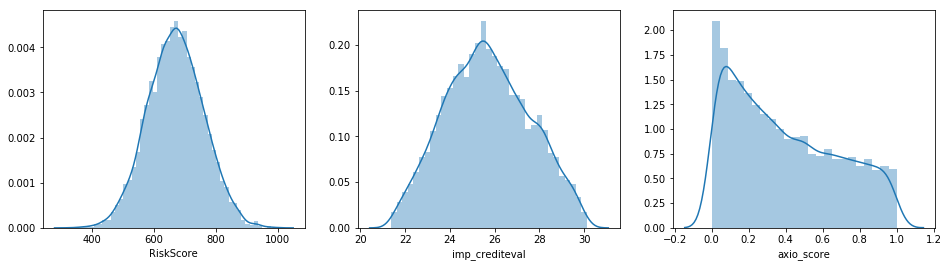

In [11]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(16,4)
sns.distplot(df['RiskScore'],kde=True ,ax=ax[0])
sns.distplot(df['imp_crediteval'],kde=True , ax=ax[1])
sns.distplot(df['axio_score'],kde=True , ax=ax[2])


It is observed that our feature set contains data that is not uniformaly distributed. Hence we need to perform scaling and stardization.

Here, we have used RobustScaler() transformer which is good at handling outliers and standardizing data. 

In [715]:
scaler = RobustScaler()
scaled_df1 = scaler.fit_transform(df1)
df1_columns = df1.columns
df1 = pd.DataFrame(scaled_df1, columns=df1_columns)
#df1.head()

df_train = pd.concat([dummies_df , df1 ], axis=1)

df_train.head()


df_train.shape

(10000, 15)

## Deciding evaluation metric for our model
As we know that the company should be able to target people who are most likely to accept card offer if contacted.

Thus we need to minimise the prediction where our model predicts TRUE for a customer but in reality the customer rejects the offer.

This implies that we need to minimize our False Positive (FP) Rate.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/38/Accuracy_and_precision.svg/520px-Accuracy_and_precision.svg.png">
Accuracy is the proximity of measurement results to the true value; precision, the repeatability, or reproducibility of the measurement.
<hr>

Accuracy : Overall, how often is the classifier correct? 

<strong>(TP+TN) / (TP+TN+FP+FN)</strong>
<hr>
Precision(P) : When it predicts yes, how often is it correct? 

<strong>TP / (TP+FP)</strong>
<hr>
Recall(R) : When it predicts yes, how many is actully correct? 

<strong>TP / (TP+FN)</strong>
<hr>
F1 Score : F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account 

<strong>2* (P*R) / (P+R)</strong>

##### In our case, we need F1 Score as evaluation metric for models. You can observe that if FP  and FN count decreases our prediction becomes more targeted towards those who can actually accept the card offer

### Basic Model Building.

In [716]:
df_train.head()
X = df_train.drop('card_offer',axis=1)
y = df_train['card_offer']
#test_X = df_test

In [717]:
train_X, test_X, train_y,test_y = train_test_split(X,y, test_size= 0.2, random_state= 42)


##### Here, we are splitting our entire transformed dataset into 80:20 ratio.
- 20% test data will remain unseen for model. Hence can be used for error metric evaluation.
- 80% training data will be fed to model for training.

__1. Logistic Regression Model__

In [718]:
lr=LogisticRegression(random_state=42)
lr.fit(train_X,train_y)

y_pred = lr.predict(test_X)

print(classification_report(y_true=test_y,y_pred=y_pred))
print 'auc: {}'.format(roc_auc_score(y_true=test_y,y_score=y_pred))
print 'accuracy: {}'.format(accuracy_score(y_true=test_y,y_pred=y_pred))

             precision    recall  f1-score   support

        0.0       0.97      0.98      0.98      1696
        1.0       0.91      0.82      0.86       304

avg / total       0.96      0.96      0.96      2000

auc: 0.901874379345
accuracy: 0.9595


#### F1 Score for positive class in Logistic regression is 0.86.
<hr>

__2. Decision Tree Model__

In [721]:
dt=DecisionTreeClassifier(random_state=42)
dt.fit(train_X,train_y)

y_pred = dt.predict(test_X)

print(classification_report(y_true=test_y,y_pred=y_pred))
print 'auc: {}'.format(roc_auc_score(y_true=test_y,y_score=y_pred))
print 'accuracy: {}'.format(accuracy_score(y_true=test_y,y_pred=y_pred))

             precision    recall  f1-score   support

        0.0       0.98      0.97      0.97      1696
        1.0       0.85      0.87      0.86       304

avg / total       0.96      0.96      0.96      2000

auc: 0.922293942403
accuracy: 0.9575


#### F1 Score for positive class in Decision Tree is 0.86.
<hr>

__3. Random Forest Model__

In [722]:
rf = RandomForestClassifier(random_state=42)
rf.fit(train_X,train_y)

y_pred = rf.predict(test_X)

print(classification_report(y_true=test_y,y_pred=y_pred))
print 'auc: {}'.format(roc_auc_score(y_true=test_y,y_score=y_pred))
print 'accuracy: {}'.format(accuracy_score(y_true=test_y,y_pred=y_pred))

             precision    recall  f1-score   support

        0.0       0.97      0.99      0.98      1696
        1.0       0.93      0.81      0.87       304

avg / total       0.96      0.96      0.96      2000

auc: 0.899298659384
accuracy: 0.962


#### F1 Score for positive class in Random Forest is 0.89.
<hr>

### Model Selection using Hyperparameter Tuning

##### 1. Find best estimator for Logistic Regression

In [619]:
from sklearn.model_selection import GridSearchCV
parameters = {'penalty':('l1', 'l2'), 'C':[1, 10]}
lr_grid = LogisticRegression()
lr_clf = GridSearchCV(lr_grid, parameters, cv=3)

lr_clf.fit(train_X, train_y)
y_pred = lr_clf.predict(test_X)

lr_clf.best_estimator_

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [620]:
lr_final_grid = lr_clf.best_estimator_

lr_final_grid.fit(train_X, train_y)
y_pred = lr_final_grid.predict(test_X)

print(classification_report(y_true=test_y,y_pred=y_pred))
print 'auc: {}'.format(roc_auc_score(y_true=test_y,y_score=y_pred))
print 'accuracy: {}'.format(accuracy_score(y_true=test_y,y_pred=y_pred))

             precision    recall  f1-score   support

        0.0       0.97      0.98      0.98      1696
        1.0       0.91      0.82      0.86       304

avg / total       0.96      0.96      0.96      2000

auc: 0.901874379345
accuracy: 0.9595


#### F1 Score for positive class in Logistic Regression using best estimator is 0.86.
<hr>

##### 2. Find best estimator for Decision Tree

In [621]:
parameters = {'criterion':('gini', 'entropy'), 'max_leaf_nodes':[3, 5]}
dt_grid = DecisionTreeClassifier()
dt_clf = GridSearchCV(dt_grid, parameters, cv=3)

dt_clf.fit(train_X, train_y)
y_pred = dt_clf.predict(test_X)

dt_clf.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=3, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [623]:
dt_final_grid = dt_clf.best_estimator_

dt_final_grid.fit(train_X, train_y)
y_pred = dt_final_grid.predict(test_X)

print(classification_report(y_true=test_y,y_pred=y_pred))
print 'auc: {}'.format(roc_auc_score(y_true=test_y,y_score=y_pred))
print 'accuracy: {}'.format(accuracy_score(y_true=test_y,y_pred=y_pred))

             precision    recall  f1-score   support

        0.0       0.94      0.98      0.95      1696
        1.0       0.82      0.62      0.71       304

avg / total       0.92      0.92      0.92      2000

auc: 0.800117924528
accuracy: 0.922


#### F1 Score for positive class in Decision Tree using best estimator is 0.80.
<hr>

##### 3. Find best estimator for Random Forest.

In [624]:
parameters = {'criterion':('gini', 'entropy'), 'max_leaf_nodes':[3, 10]}
rf_grid = RandomForestClassifier(random_state =42)
rf_clf = GridSearchCV(rf_grid, parameters, cv=3)

rf_clf.fit(train_X, train_y)
y_pred = rf_clf.predict(test_X)

rf_clf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [625]:
rf_final_grid = rf_clf.best_estimator_

rf_final_grid.fit(train_X, train_y)
y_pred = rf_final_grid.predict(test_X)

print(classification_report(y_true=test_y,y_pred=y_pred))
print 'auc: {}'.format(roc_auc_score(y_true=test_y,y_score=y_pred))
print 'accuracy: {}'.format(accuracy_score(y_true=test_y,y_pred=y_pred))

             precision    recall  f1-score   support

        0.0       0.92      1.00      0.96      1696
        1.0       0.95      0.54      0.69       304

avg / total       0.93      0.93      0.92      2000

auc: 0.769023088381
accuracy: 0.9265


#### F1 Score for positive class in Random Forest using best estimator is 0.69.
<hr>

## Feature Selection

##### 1. Feature Importance by using Random Forest Regressor

##### (1 = High Importance, 0=Low Importance)

In [626]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(train_X, train_y)
print "Features sorted by their score:"
sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), train_X.columns), 
             reverse=True)

Features sorted by their score:


[(0.4993, 'pref_cust_prob'),
 (0.2633, 'est_income'),
 (0.1711, 'hold_bal'),
 (0.0326, 'imp_crediteval'),
 (0.0119, 'axio_score'),
 (0.0118, 'RiskScore'),
 (0.0027, 'demographic_slice_DERS3w5'),
 (0.002, 'country_reg_E'),
 (0.0012, 'demographic_slice_CARDIF2'),
 (0.001, 'demographic_slice_AX03efs'),
 (0.001, 'country_reg_W'),
 (0.0008, 'demographic_slice_BWEsk45'),
 (0.0008, 'ad_exp_N'),
 (0.0005, 'ad_exp_Y')]

__1. Logistic Regression Model using Feature Importance__

In [627]:
lr_final.fit(train_X.drop(['ad_exp_N','demographic_slice_BWEsk45','demographic_slice_AX03efs','ad_exp_Y'], axis=1), train_y)
y_pred = lr_final.predict(test_X.drop(['ad_exp_N','demographic_slice_BWEsk45','demographic_slice_AX03efs','ad_exp_Y'], axis=1))

print(classification_report(y_true=test_y,y_pred=y_pred))
print 'auc: {}'.format(roc_auc_score(y_true=test_y,y_score=y_pred))
print 'accuracy: {}'.format(accuracy_score(y_true=test_y,y_pred=y_pred))

             precision    recall  f1-score   support

        0.0       0.97      0.98      0.98      1696
        1.0       0.90      0.83      0.86       304

avg / total       0.96      0.96      0.96      2000

auc: 0.904869041708
accuracy: 0.96


#### F1 Score for positive class in Logistic Regression using Feature Importance is 86.
<hr>

__2. Decision Tree Model using Feature Importance__

In [628]:
dt_final.fit(train_X.drop(['ad_exp_N','demographic_slice_BWEsk45','demographic_slice_AX03efs','ad_exp_Y'], axis=1), train_y)
y_pred = dt_final.predict(test_X.drop(['ad_exp_N','demographic_slice_BWEsk45','demographic_slice_AX03efs','ad_exp_Y'], axis=1))

print(classification_report(y_true=test_y,y_pred=y_pred))
print 'auc: {}'.format(roc_auc_score(y_true=test_y,y_score=y_pred))
print 'accuracy: {}'.format(accuracy_score(y_true=test_y,y_pred=y_pred))

             precision    recall  f1-score   support

        0.0       0.96      0.97      0.97      1696
        1.0       0.84      0.77      0.80       304

avg / total       0.94      0.94      0.94      2000

auc: 0.871601911619
accuracy: 0.9425


#### F1 Score for positive class in Decision Tree using Feature Importance is 80.
<hr>

__3. Random Forest Model using Feature Importance__

In [629]:
rf_final.fit(train_X.drop(['ad_exp_N','demographic_slice_BWEsk45','demographic_slice_AX03efs','ad_exp_Y'], axis=1), train_y)
y_pred = rf_final.predict(test_X.drop(['ad_exp_N','demographic_slice_BWEsk45','demographic_slice_AX03efs','ad_exp_Y'], axis=1))

print(classification_report(y_true=test_y,y_pred=y_pred))
print 'auc: {}'.format(roc_auc_score(y_true=test_y,y_score=y_pred))
print 'accuracy: {}'.format(accuracy_score(y_true=test_y,y_pred=y_pred))

             precision    recall  f1-score   support

        0.0       0.93      0.99      0.96      1696
        1.0       0.93      0.57      0.70       304

avg / total       0.93      0.93      0.92      2000

auc: 0.779357000993
accuracy: 0.928


#### F1 Score for positive class in Random Forest using Feature Importance is 72.
<hr>

__2. Feature Selection using RFE(Recursive Feature Elimination)__

In [630]:
# create the RFE model and select 8 attributes
rfe1 = RFE(lr, 9)
rfe1 = rfe1.fit(train_X, train_y)
print ('Logistic Regression Feature Rankings:')
print(rfe1.ranking_)
print ('==')*40

rfe2 = RFE(dt, 9)
rfe2 = rfe2.fit(train_X, train_y)
print ('Decision Tree Feature Rankings:')
print(rfe2.ranking_)
print ('==')*40

rfe3 = RFE(rf, 9)
rfe3 = rfe3.fit(train_X, train_y)
print ('Random Forest Feature Rankings:')
print(rfe2.ranking_)
print ('==')*40

Logistic Regression Feature Rankings:
[1 3 1 4 1 1 1 1 1 1 1 6 2 5]
Decision Tree Feature Rankings:
[3 6 5 1 1 1 4 2 1 1 1 1 1 1]
Random Forest Feature Rankings:
[3 6 5 1 1 1 4 2 1 1 1 1 1 1]


In [631]:
seed = 42
scoring = 'f1'
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('RF', RandomForestClassifier()))
models.append(('DT', DecisionTreeClassifier()))

from sklearn.model_selection import cross_val_score,KFold
# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, train_X, train_y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f" % (name, cv_results.mean())
    print(msg)

LR: 0.877487
RF: 0.867217
DT: 0.882977


__Decision Tree Model__ performed better in kfold 

In [632]:
#Selecting rfe2 features since dt performed good in KFold
X = df_train.iloc[:,[3,5,6,5,6,8,9,10,11,12,13]]
y = df_train.card_offer
train_X,test_X,train_y,test_y = train_test_split(X,y,random_state=9,test_size=.2)
dt_rfe = DecisionTreeClassifier()
dt_rfe.fit(train_X,train_y)

y_pred = dt_rfe.predict(test_X)


print(classification_report(y_true=test_y,y_pred=y_pred))
print 'auc: {}'.format(roc_auc_score(y_true=test_y,y_score=y_pred))
print 'accuracy: {}'.format(accuracy_score(y_true=test_y,y_pred=y_pred))

             precision    recall  f1-score   support

        0.0       0.98      0.98      0.98      1703
        1.0       0.89      0.91      0.90       297

avg / total       0.97      0.97      0.97      2000

auc: 0.946833771261
accuracy: 0.971


#### F1 Score for positive class in Decision Tree using RFE is 89.
<hr>

## Test Data Prediction

In [723]:
df_test = df_test1.copy()
df_test.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
customer_id          10000 non-null int64
demographic_slice    10000 non-null object
country_reg          10000 non-null object
ad_exp               10000 non-null object
est_income           10000 non-null float64
hold_bal             10000 non-null float64
pref_cust_prob       10000 non-null float64
imp_cscore           10000 non-null int64
RiskScore            10000 non-null float64
imp_crediteval       10000 non-null float64
axio_score           10000 non-null float64
card_offer           0 non-null float64
dtypes: float64(7), int64(2), object(3)
memory usage: 820.3+ KB


In [724]:
df_test['card_offer'] = 0
#df_test.head()

In [725]:
#test Data set
dummies_df_test = pd.get_dummies(df_test[["demographic_slice","country_reg" , "ad_exp"]])
print dummies_df_test.shape
df1_test = df_test.copy()
df1_test.drop(["demographic_slice","country_reg" , "ad_exp", "imp_cscore"], axis=1 ,inplace=True)
print df1_test.info()
df1_test.head()

(10000, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
customer_id       10000 non-null int64
est_income        10000 non-null float64
hold_bal          10000 non-null float64
pref_cust_prob    10000 non-null float64
RiskScore         10000 non-null float64
imp_crediteval    10000 non-null float64
axio_score        10000 non-null float64
card_offer        10000 non-null int64
dtypes: float64(6), int64(2)
memory usage: 625.0 KB
None


,customer_id,est_income,hold_bal,pref_cust_prob,RiskScore,imp_crediteval,axio_score,card_offer
0,596723,26323.092375,3.000000,0.461364,505.509062,23.806688,0.351222,0
1,841834,67374.621654,17.861095,0.473517,466.158076,26.068803,0.080106,0
2,402401,1728.369713,21.604489,0.486220,603.346280,23.628955,0.208180,0
3,734431,15814.210261,22.058403,0.462249,747.158221,22.533957,0.080122,0
4,739547,45233.588193,1.000000,0.541660,704.781194,24.298782,0.667270,0


In [726]:
df1_test.drop(['customer_id'],inplace=True, axis=1)
df1_test.shape

(10000, 7)

In [558]:
#df1_test['card_offer'] = 0

In [727]:
#print len(df1_test.columns)
scaler = RobustScaler()
scaled_df1_test = scaler.fit_transform(df1_test)
df1_columns = df1_test.columns
df1 = pd.DataFrame(scaled_df1_test, columns=df1_columns)
#df1.head()

df_test = pd.concat([dummies_df_test , df1_test], axis=1)

#df_test.shape


In [728]:
#df_test.head()
X = df_test.drop("card_offer",axis=1)
#X.shape
#y_final =dt.predict(X)

In [729]:
#X = df_test.drop(['ad_exp_N','demographic_slice_BWEsk45','demographic_slice_AX03efs','ad_exp_Y','card_offer'], axis=1)
#X = df_test.iloc[:,[3,5,6,5,6,8,9,10,11,12,13]]

#dt.fit(train_X,train_y)

y_pred = dt.predict(X)
total_test_rows = y_pred.shape[0]
positive_test_count = np.count_nonzero(y_pred)
print 'Positive Test class by using basic Decision Tree Model: {}'.format (positive_test_count)

Positive Test class by using basic Decision Tree Model: 2264


In [730]:
percentage_recommended = 100 * float(positive_test_count) / float(total_test_rows)
print 'Positive Test class by using basic Decision Tree Model(Percentage): {}'.format(percentage_recommended)+"%"

Positive Test class by using basic Decision Tree Model(Percentage): 22.64%


In [731]:
excel_df = df_test1.copy()
excel_df['card_offer'] =  y_pred
excel_df.head()

,customer_id,demographic_slice,country_reg,ad_exp,est_income,hold_bal,pref_cust_prob,imp_cscore,RiskScore,imp_crediteval,axio_score,card_offer
0,596723,AX03efs,W,N,26323.092375,3.000000,0.461364,603,505.509062,23.806688,0.351222,0.0
1,841834,AX03efs,E,Y,67374.621654,17.861095,0.473517,650,466.158076,26.068803,0.080106,0.0
2,402401,AX03efs,E,N,1728.369713,21.604489,0.486220,606,603.346280,23.628955,0.208180,0.0
3,734431,AX03efs,E,Y,15814.210261,22.058403,0.462249,530,747.158221,22.533957,0.080122,0.0
4,739547,AX03efs,W,Y,45233.588193,1.000000,0.541660,640,704.781194,24.298782,0.667270,1.0


In [732]:
writer = pd.ExcelWriter('Desktop/output.xlsx')
excel_df.to_excel(writer,'Sheet1')
writer.save()

## Conclusion

As per given dataset we go with F1 Score as evaluation metric for our models. You can observe that if FP and FN count decreases our prediction becomes more targeted towards those who can actually accept the card offer.
Our Basic Decision Tree Model has given good __F1 score(90%)__, so we finally concluded that Decision Tree model works better on unseen given Dataset.
Our Final Model has predict __22.64%__ customer will response to the Card Offer.